# Laboratorio 1


# Objetivos


Aprendera a implementar el modelo  $f_{w,b}$ para la regresión lineal con una sola variable 

## Notacion General



|General Notation | Description| Python (if applicable) |
|-----|:-----|:---:|
| a | scalar, non bold || 
| a | vector, bold || 
| Regression | | | | 
| x | Training Example feature values (Size (1000 $m^{2}$)) | x_train |
| y | Training Example targets (Price (1000s of pesos)) | y_train 
| $x^{(i)}$, $y^{(i)}$ | $i_{th}$ Training Example | x_i, y_i| 
| m | Number of training examples | m| 
| w | parameter: weight | w | 
| b | parameter: bias | b |
| $f_{w,b}(x^{(i)})$ | The result of the model evaluation at $x^{(i)}$ parameterized by $w, b$: $f_{w,b}(x^{(i)}) = wx^{(i)} +b$| f_wb |


 	

## Problema

El ejemplo básico de la predicción del precio de las propiedades según el tamaño de la misma 

Se ejemplifica con 3 puntos.

Una propiedad con 1000 $m^{2}$ vendida en 3 millones y una propiedad con 2000 metros cuadrados vendida en 5 millones. 

Estos dos unicos puntos serán tomados como nuestro conjutno de entrenamiento (training set) 


|index | Size (1000 $m^{2}$)     | Price (10000s de pesos) |
|------| ------------------------| ------------------------ |
|   0  | 1.0                     | 300                      |
|   1  | 2.0                     | 500                      |
|   2  | 3.0                     | 600                      |
|   3  | 4.0                     | 660                      |
|   4  | 5.0                     | 800                      |
|   5  | 6.0                     | 900                      |


Debemos ajustar un modelo de regresión lineal a través de estos dos puntos, para poder predecir el precio para otras propiedades, por ejemplo una propiedad con 1320  $m^{2}$. 


In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from IPython import get_ipython
ipy = get_ipython()
if ipy is not None:
    ipy.run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt


In [2]:
# x_train is the input varibale (size in 1000 m^2)
# y_train in the target (precio en millones de pesos)
x_train = np.array([1.0, 2.0, 3.0])
y_train = np.array([300, 500, 600])
print(f"x_train={x_train}")
print(f"y_train={y_train}")

x_train=[1. 2. 3.]
y_train=[300 500 600]


## Numero de ejemplos de entrenamiento (training examples - m) 

Use `m` para denotar el numero de ejemplos de entrenamiento. 

In [3]:
# m is the number of training examples


print(f"x_train.shape:{x_train.shape}")
m = len(x_train)
print(f"Number of training examples is: {m}")


x_train.shape:(3,)
Number of training examples is: 3


## Training example x_i, y_i

Podríamos usar (x$^{(i)}$, y$^{(i)}$) para denotar el $i^{th}$ ejemplo de entrenamiento. Recuerde que Python inicializa en 0, por eso en la tabla anterior se publicó el índice. Quedando (x$^{(0)}$, y$^{(0)}$) es (1.0, 3.0) y (x$^{(1)}$, y$^{(1)}$) es (2.0, 5.0). 

El siguiente código es para obtener el $i^{th}$ ejemplo de entrenamiento.

In [4]:

i=1 #(x^1, y^1)
x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}),y^({i}))=({x_i},{y_i})")

(x^(1),y^(1))=(2.0,500)


## Plotting the data - Graficando los datos

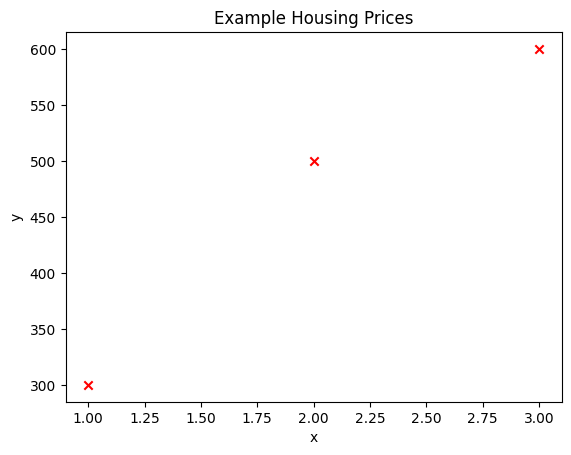

In [5]:
# Plot the data points
plt.scatter(x_train, y_train, marker = 'x', c='r')
# Set the title
plt.title("Example Housing Prices")
# set the y-axis label
plt.ylabel('y')
# set the x-axis label
plt.xlabel('x')
plt.show()

## Función modelo

El modelo de función para la regresion lineal ( la cual es una función que mapea de  `x` a `y`) es representada como 

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

La formula arriba muestra como puedes representar las lineas rectas - valores diferentes de $w$ y $b$ nos dan diferentes lineas rectas en la grafica.

Si iniciamos con $w = 100$ y $b = 100$. 

**Note: Regrese a la celda (cell) siguiente para ajustar los parametros w,b**

In [6]:
w = 100
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 100
b: 100


Ahora, calcule el valor para $f_{w,b}(x^{(i)})$ para los dos puntos. Es posible escribir explicitamente para cada punto de la siguiente forma 

for $x^{(0)}$, `f_wb = w * x[0] + b`

for $x^{(1)}$, `f_wb = w * x[1] + b`

En lugar de hacer cada punto, podemos usar el ciclo `for`  para calcularlo con la funcion `compute_model_output`



In [7]:
# The argument description `(ndarray (m,))` describes a Numpy n-dimensional array of shape (m,). `(scalar)` describes an argument without dimensions, just a magnitude.  
# `np.zero(n)` will return a one-dimensional numpy array with $n$ entries  

def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      y (ndarray (m,)): target values
    """
   
    
    m = x.shape[0]

    f_wb = np.zeros(m)
    
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

Ahora, ejecute la funcion `compute_model_output` y grafique la salida

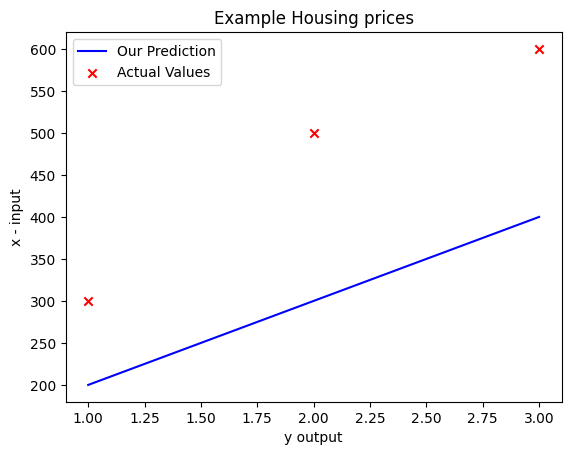

In [8]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Example Housing prices")
# Set the y-axis label
plt.ylabel('x - input')
# Set the x-axis label
plt.xlabel('y output')
plt.legend()
plt.show()

Como puede ver  $w = 100$ y $b = 100$ no son la mejor linea para los datos
### Exprerimente
Ahora, puebe diferentes valores para  $w$ y $b$, y preguntese, Cuales deberian ser los mejores valores para estos datos. 

* Corrija los titulos de los ejes. 
* Experimente con dos datos y con mas de tres datos
* Escriba sus conclusiones sustentándolas con los ejemplos y gráficas respectivas

In [51]:
def graficaExperimente(x_train, y_train, tmp_f_wb , w, b , imagen):
    plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')
    plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
    plt.title(f"Example {imagen} Housing prices w={w} , b = {b}")
    plt.ylabel('x - price')
    plt.xlabel('y - size')
    plt.legend()
    plt.savefig(f"Prediccion_{imagen}_{w}_{b}.png" )
    plt.show()

def predict_new_value(new_x, w, b):
    return compute_model_output(new_x, w, b)

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)


#Datos para w y b
|index | W                       | b                        |
|------| ------------------------| ------------------------ |
|   0  | 100                     | 100                      |
|   1  | 150                     | 300                      |
|   2  | 400                     | 200                      |
|   3  | 500                     | 400                      |
|   4  | 505                     | 500                      |


x_train=[7.31500066 9.18411069 6.95037691 8.14246065 8.14889407 7.69027708
 2.62645601 6.37080558 3.38095969 7.7054338  8.03055708 1.09042609
 5.74086721 5.83934393 0.58264995 4.44233536 7.6104929  2.28536918
 4.08386931 2.05951489 6.41390981 1.98955776 6.60688343 4.16292675
 3.12674221 0.85537561 8.42741421 1.58945523 1.15394547 7.59099647]
y_train=[ 19.02736727 528.31859352 992.51189033  26.14724999 586.66639045
  22.04697638 194.54484296 137.45170597 276.31071685 779.8402754
 559.52864384 828.66774391   9.94242285 548.87709238 611.91304999
 944.3519078  657.44135448 567.79762233 178.94854096 435.60209782
 817.34340769 186.80683371 161.88545491 226.08092575 698.09246732
 177.97873445  84.22933839 376.58671402 571.54155449 874.01091868]


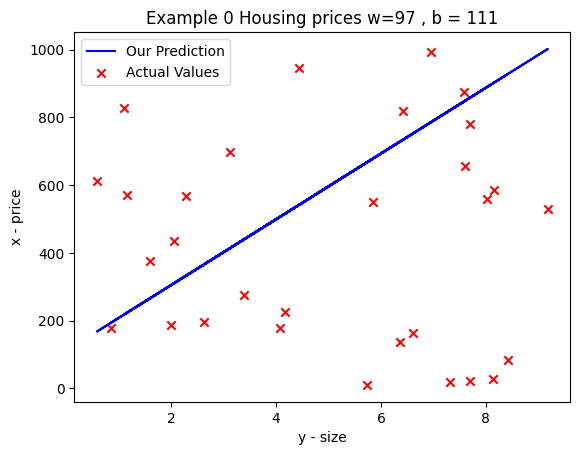

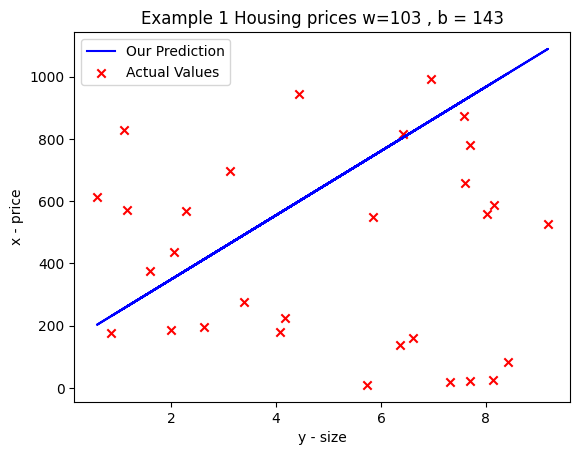

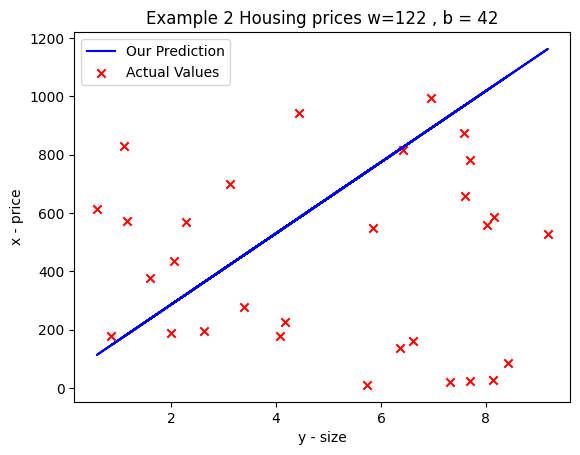

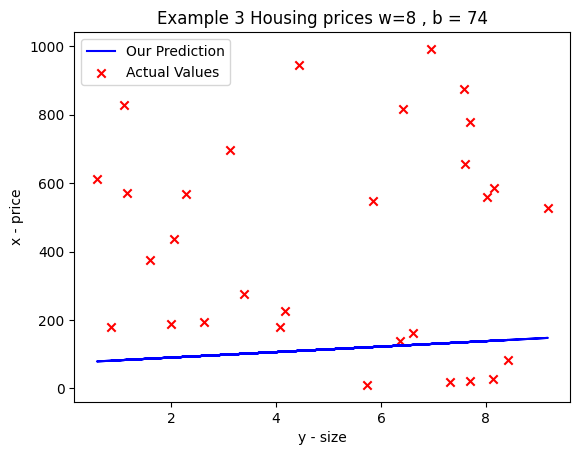

El mejor valor de w: 97
El mejor valor de b: 111
MSE correspondiente: 192364.50178451175
El precio predicho para una propiedad de [1.32] metros cuadrados es: [239.04]


In [58]:
n = 30
x_train = np.random.rand(n) * 10  # Genera n números aleatorios entre 0 y 10
y_train = np.random.rand(n) * 1000  # Genera n números aleatorios entre 0 y 1000
# x_train = np.array([1.0, 2.0, 3.0,4.0, 5.0, 6.0])
# y_train = np.array([300, 500, 600,660, 800, 900])
print(f"x_train={x_train}")
print(f"y_train={y_train}")

n = 4
# Valores de prueba para w y b
valores_b = (np.random.rand(n) * 150).astype(int)
valores_w = (np.random.rand(n) * 150).astype(int)

# valores_w =[100,150,400,500,505] 
# valores_b =[100,300,200,400,500] 


mse_valores = []
cont = 0
for w, b in zip(valores_w, valores_b):
    tmp_f_wb = compute_model_output(x_train, w, b)
    mse_valores.append(mean_squared_error(y_train, tmp_f_wb))
    graficaExperimente(x_train, y_train, tmp_f_wb,w, b, cont)
    cont += 1

# Encuentra la combinación con el menor MSE
indice_mejor = np.argmin(mse_valores)
mejor_w = valores_w[indice_mejor]
mejor_b = valores_b[indice_mejor]

print("El mejor valor de w:", mejor_w)
print("El mejor valor de b:", mejor_b)
print("MSE correspondiente:", mse_valores[indice_mejor])


# Predicción para una propiedad de 1320 metros cuadrados
new_x = np.array([1.320])
predicted_price = predict_new_value(new_x, mejor_w, mejor_b)
print(f"El precio predicho para una propiedad de {new_x} metros cuadrados es: {predicted_price}")

El objetivo es encontrar los valores de (w) y (b) que mejor se ajusten a tus datos de entrenamiento. Esto implica minimizar el error entre las predicciones del modelo y los valores reales.

# Predicción
Ahora, que ya tiene su modelo uselo para la prediccion original. Prediga el precio de la propiedad con 1320 metros cuadrados. 




In [18]:
new_x = np.array([1.320])
predicted_price = predict_new_value(new_x, mejor_w, mejor_b)
print(f"El precio predicho para una propiedad de {new_x} metros cuadrados es: {predicted_price}")

El precio predicho para una propiedad de [1.32] metros cuadrados es: [232.]


## Conclusiones 
Durante los experimentos realizados, se modificaron los parámetros (w) y (b) en un modelo de regresión lineal. Observamos que variar estos parámetros tiene un impacto directo en el modelo de regresion lineal, valores más grandes de (w) hacen que la línea sea más inclinada, mientras que valores más pequeños la hacen menos inclinada. Por otro lado, el parámetro (b) determina cuánto se desplaza la línea verticalmente en el eje de las (y). La elección cuidadosa de estos parámetros es crucial para minimizar el error y lograr un buen ajuste a los datos de entrenamiento.

Una vez que obtuvimos w y b con el que consideramos el menor error podemos predecir un nuevo valor El precio predicho para una propiedad de [1.32] metros cuadrados es: [232.] en el experimento y en el segundo [239.04] por el cual no tenemos mucha diferencia en la prediccion.

De igual manera podemos observar en las graficas que entre menos datos de entrenamiento ocupemos, es mas complicado aproximar la recta, Como lo vemos en la grafica con dos datos del primer experiemnto , pero si agremas mucho mas datos es mas facil minimizar el error como lo vemos en el experiemnto 2 en donde la recta pasa por encima de los dos y tres puntos respectivamente.

ente